# ZADANIA

* Skopiuj i wklej opracowany powyżej model do komórek poniżej.
* Modyfikuj hiperparametry modelu (struktura, liczba warstw w sieci i liczba filtrów na warstwę splotu, parametry zaniku itp.) i uzyskaj lepszą dokładność dla obu modeli: MNIST i CIFAR-10.
* Zmniejsz duże obciążenie modelu CIFAR-10, nie zwiększając ani nawet nie zmniejszając wariancji modelu.
* Porównaj dokładność i straty swojego modelu z wcześniej wyszkolonymi modelami (PlotTwoAccuracyComparison i PlotTwoLossComparison).
* Spróbuj przeprowadzić podobne eksperymenty na innym zbiorze danych szkoleniowych obrazów, np. pobrany z <a href="www.kaggle.com">Kaggle.com</a> lub innego źródła. Utwórz nowy model CNN i zaimplementuj regularyzacje oraz inne metody optymalizacji, próbując zmniejszyć obciążenie i wariancję modelu.

* Wyślij opracowany model CNN jako odpowiedź do tego zadania na MS Teams.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

plt.rcParams['figure.figsize'] = (15.0, 5.0) # set default size of plots

### CIFAR-10

In [2]:
models_dir = 'models/'

if not os.path.exists(models_dir):
    os.mkdir(models_dir)

In [3]:
num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
model = models.Sequential()
model.add(layers.InputLayer(shape=input_shape))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
batch_size = 256
epochs = 50

data_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_generator = data_generator.flow(x_train, y_train, batch_size=batch_size)

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy',
             F1Score(name='f1_score')
    ]
)

history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/50


c:\Users\Maciek\anaconda3\envs\ggsn\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 41s 194ms/step - accuracy: 0.2214 - f1_score: 0.2103 - loss: 2.0797 - val_accuracy: 0.4394 - val_f1_score: 0.4155 - val_loss: 1.5124
Epoch 2/50
  1/195 ━━━━━━━━━━━━━━━━━━━━ 26s 139ms/step - accuracy: 0.3828 - f1_score: 0.3840 - loss: 1.6542

c:\Users\Maciek\anaconda3\envs\ggsn\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3828 - f1_score: 0.3840 - loss: 0.8313 - val_accuracy: 0.4434 - val_f1_score: 0.4277 - val_loss: 1.5051
Epoch 3/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 181ms/step - accuracy: 0.4322 - f1_score: 0.4261 - loss: 1.5519 - val_accuracy: 0.5361 - val_f1_score: 0.5207 - val_loss: 1.2734
Epoch 4/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5352 - f1_score: 0.5335 - loss: 0.7193 - val_accuracy: 0.5308 - val_f1_score: 0.5160 - val_loss: 1.2682
Epoch 5/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 183ms/step - accuracy: 0.5203 - f1_score: 0.5154 - loss: 1.3298 - val_accuracy: 0.5560 - val_f1_score: 0.5333 - val_loss: 1.2355
Epoch 6/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5625 - f1_score: 0.5538 - loss: 0.6204 - val_accuracy: 0.5620 - val_f1_score: 0.5389 - val_loss: 1.2162
Epoch 7/50
195/195 ━━━━━━━━━━━━━━━━━━━━ 36s 182ms/step - accuracy: 0.5633 - f1_score: 0.5607 - loss: 1.2193 - val_accuracy: 0.6287 - val_f1_score: 0.619

In [18]:
model.save(models_dir + 'my_cifar10_cnn.h5')

Wczytajmy wytrenowany model CNN z notebooka 3 i porównajmy wyniki z nowym modelem.

In [8]:
example_model = models.load_model(models_dir + 'CNN_CIFAR-10_2.h5')

In [9]:
print('My model accuracy:', model.evaluate(x_test, y_test)[1])
print('Example model accuracy:', example_model.evaluate(x_test, y_test)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8107 - f1_score: 0.8086 - loss: 0.5512
My model accuracy: 0.8097000122070312
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - acc: 0.7841 - loss: 0.7480
Example model accuracy: 0.777400016784668


Jak widać udało sie uzyskać dokładność (81%) większą niż w przykładzie (78%).

### Inny zbiór danych

Wybrałem zbiór danych [Rice Image](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset). Zawiera 75,000 przykładów, po 15,000 dla każdej z pięciu klas. Każdy obraz ma rozmiar 250x250 pikseli.

#### Podział zbioru

In [10]:
path = 'data-rice/'
folders = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

data = {'image_path': [], 'label': []}
for folder in folders:
    for image in os.listdir(path + folder):
        data['image_path'].append(path + folder + '/' + image)
        data['label'].append(folder)

data = pd.DataFrame(data)

data['label'] = pd.Categorical(data['label'])

In [11]:
train_df, test_df = train_test_split(data, test_size=0.2)
val_df, test_df = train_test_split(test_df, test_size=0.5)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [12]:
target_img_size = (128, 128)
batch_size = 128

generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_data = generator.flow_from_dataframe(
    train_df, 
    x_col='image_path', 
    y_col='label', 
    target_size=target_img_size, 
    batch_size=batch_size, 
    color_mode='rgb')

val_data = generator.flow_from_dataframe(
    val_df, 
    x_col='image_path', 
    y_col='label', 
    target_size=target_img_size, 
    batch_size=batch_size, 
    color_mode='rgb')

test_data = generator.flow_from_dataframe(
    test_df, 
    x_col='image_path', 
    y_col='label', 
    target_size=target_img_size, 
    batch_size=batch_size, 
    color_mode='rgb')

Found 60000 validated image filenames belonging to 5 classes.
Found 7500 validated image filenames belonging to 5 classes.
Found 7500 validated image filenames belonging to 5 classes.


#### Budowa modelu

In [13]:
rice_model = models.Sequential()
rice_model.add(layers.InputLayer(shape=(128, 128, 3)))
# rice_model.add(layers.BatchNormalization())
rice_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
rice_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
rice_model.add(layers.Dropout(0.25))
# rice_model.add(layers.BatchNormalization())
rice_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
rice_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
rice_model.add(layers.Dropout(0.25))
# rice_model.add(layers.BatchNormalization())
rice_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
rice_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
rice_model.add(layers.Dropout(0.25))
# rice_model.add(layers.BatchNormalization())
rice_model.add(layers.Flatten())
rice_model.add(layers.Dense(32, activation='relu'))
rice_model.add(layers.Dense(5, activation='softmax'))

rice_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       802,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,261 (3.42 MB)

 Trainable params: 896,261 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

#### Proces uczenia

In [14]:
rice_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_rice = rice_model.fit(
    train_data,
    # steps_per_epoch=len(train_df) // batch_size,
    batch_size = 32,
    epochs=10,
    validation_data=val_data
)
    

Epoch 1/10


c:\Users\Maciek\anaconda3\envs\ggsn\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 331s 697ms/step - accuracy: 0.7767 - loss: 0.5380 - val_accuracy: 0.9557 - val_loss: 0.1282
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 298s 631ms/step - accuracy: 0.9702 - loss: 0.0887 - val_accuracy: 0.9787 - val_loss: 0.0632
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 300s 634ms/step - accuracy: 0.9795 - loss: 0.0560 - val_accuracy: 0.9793 - val_loss: 0.0569
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 300s 634ms/step - accuracy: 0.9852 - loss: 0.0447 - val_accuracy: 0.9904 - val_loss: 0.0308
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 298s 629ms/step - accuracy: 0.9864 - loss: 0.0394 - val_accuracy: 0.9933 - val_loss: 0.0260
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 300s 633ms/step - accuracy: 0.9893 - loss: 0.0335 - val_accuracy: 0.9895 - val_loss: 0.0368
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 300s 634ms/step - accuracy: 0.9893 - loss: 0.0328 - val_accuracy: 0.9880 - val_loss: 0.0388
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 299s 632ms/step - accuracy: 0.9904 - loss: 0.02

In [15]:
rice_model.save(models_dir + 'CNN_Rice.h5')

#### Wyniki

In [16]:
def plot_accuracies(histories, title=None):
    plt.figure()
    colors = ['r', 'g', 'b', 'k', 'c', 'm', 'y', 'orange']
    if len(histories) > len(colors):
        raise ValueError('histories may contain at most 8 elements')
    epochs = range(1, len(histories[0].history['accuracy']))
    for i, history in enumerate(histories):
        plt.plot(epochs, history.history['accuracy'][1:], f'-{colors[i]}', label=f'train accuracy for {histories[i].model.name}')
        plt.plot(epochs, history.history['val_accuracy'][1:], f'--{colors[i]}', label=f'validation accuracy for {histories[i].model.name}')
    title = title if title else 'model accuracy'
    plt.title(title)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

def plot_losses(histories, title=None):
    plt.figure()
    colors = ['r', 'g', 'b', 'k', 'c', 'm', 'y', 'orange']
    if len(histories) > len(colors):
        raise ValueError('histories may contain at most 8 elements')
    epochs = range(1, len(histories[0].history['loss']))
    for i, history in enumerate(histories):
        plt.plot(epochs, history.history['loss'][1:], f'-{colors[i]}', label=f'train loss for {histories[i].model.name}')
        plt.plot(epochs, history.history['val_loss'][1:], f'--{colors[i]}', label=f'validation loss for {histories[i].model.name}')
    title = title if title else 'model loss'
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

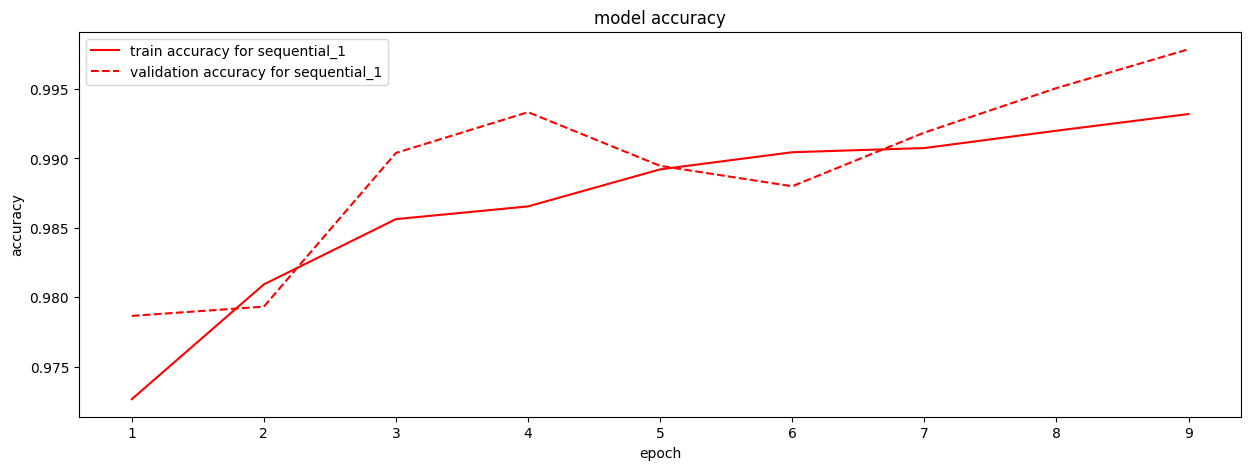

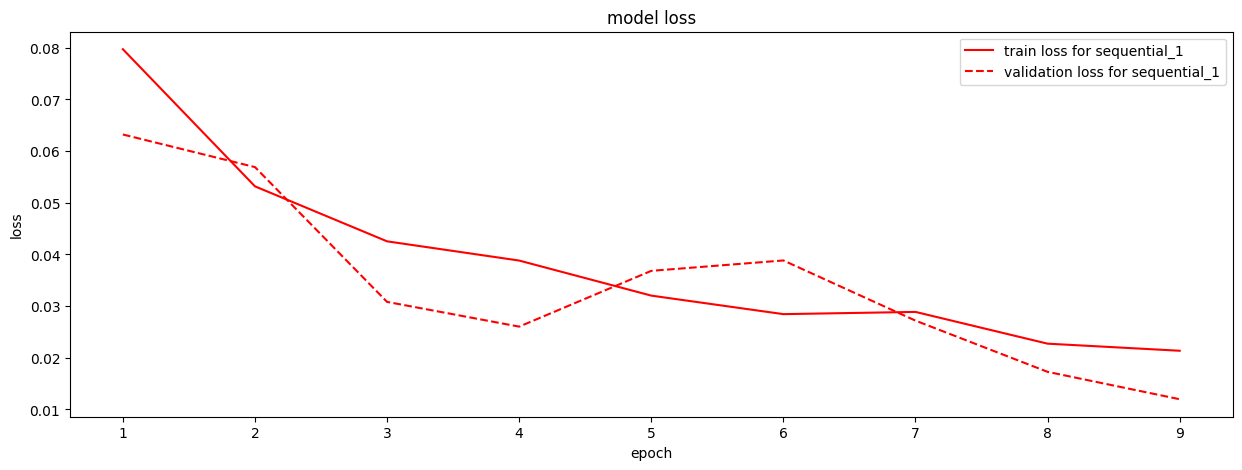

In [17]:
plot_accuracies([history_rice])
plot_losses([history_rice])

Już po 10 epokach udało się osiągnąc dokładność 99,8% na zbiorze testowym.